Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

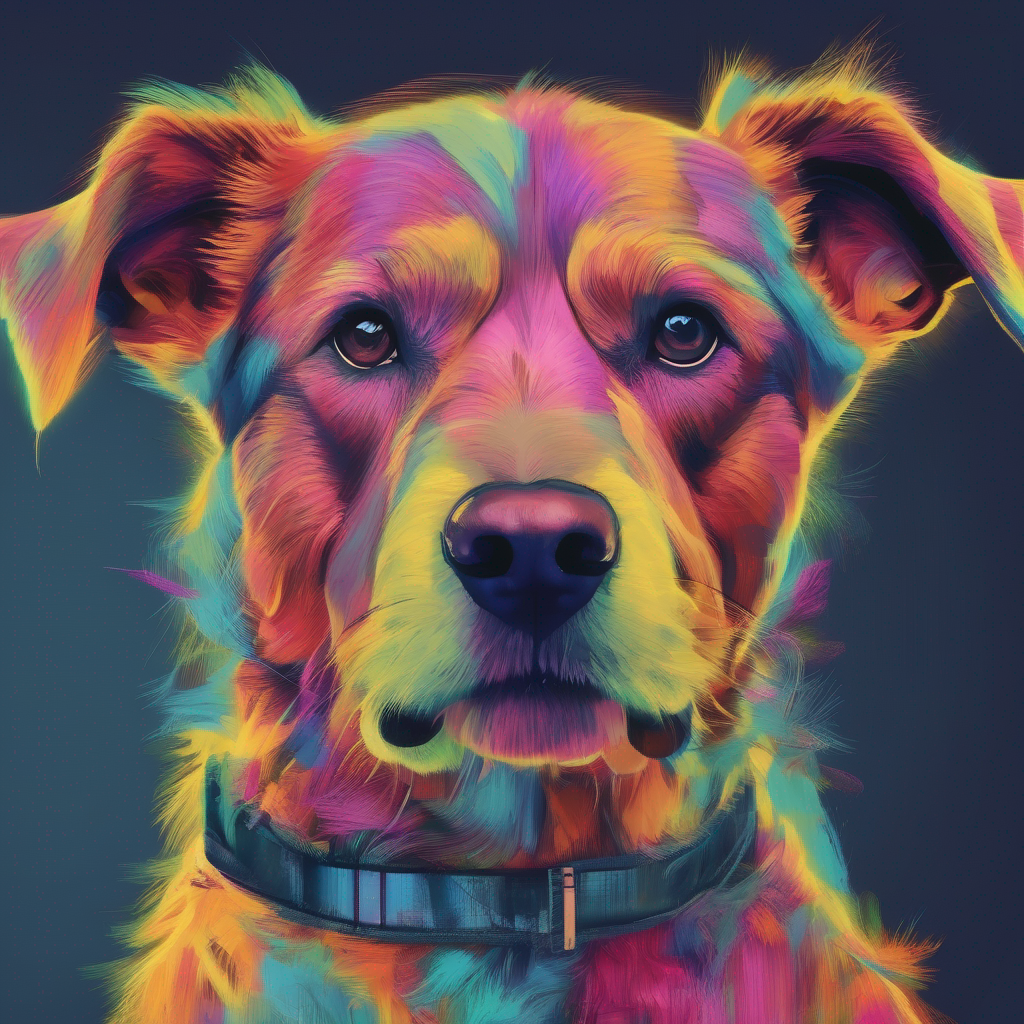

In [1]:
import torch
from diffusers import DiffusionPipeline


pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
).to("cuda")

gen = torch.Generator().manual_seed(42)
pipe("a colorful, movie like photo of dog", generator=gen).images[0]

In [2]:
# in the future, you use the unet safetensor
from safetensors.torch import save_file, load_file

save_file(pipe.unet.state_dict(), "unet.safetensors")

In [1]:
from safetensors.torch import load_file
import torch
from sdxl_rewrite import UNet2DConditionModel

from diffusers.models.modeling_utils import ModelMixin

# You need to do this to imitate the diffuser's ModelMixin behavior


class hfdiff(UNet2DConditionModel, ModelMixin):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        pass


tensors = load_file("unet.safetensors")
with torch.device("cuda"):
    with torch.cuda.amp.autocast():
        unet_new = hfdiff().half()
        unet_new.load_state_dict(tensors)

unet_new.eval()

hfdiff(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (add_time_proj): Timesteps()
  (add_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=2816, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): DownBlock2D(
      (resnets): ModuleList(
        (0-1): 2 x ResnetBlock2D(
          (norm1): GroupNorm(32, 320, eps=1e-05, affine=True)
          (conv1): Conv2d(320, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (time_emb_proj): Linear(in_features=1280, out_features=320, bias=True)
          (norm2): GroupNorm(32, 320, eps=1e-05, affine=True)
          (dropout): Dropout(p=0.0, inplace=F

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9
4
7
9


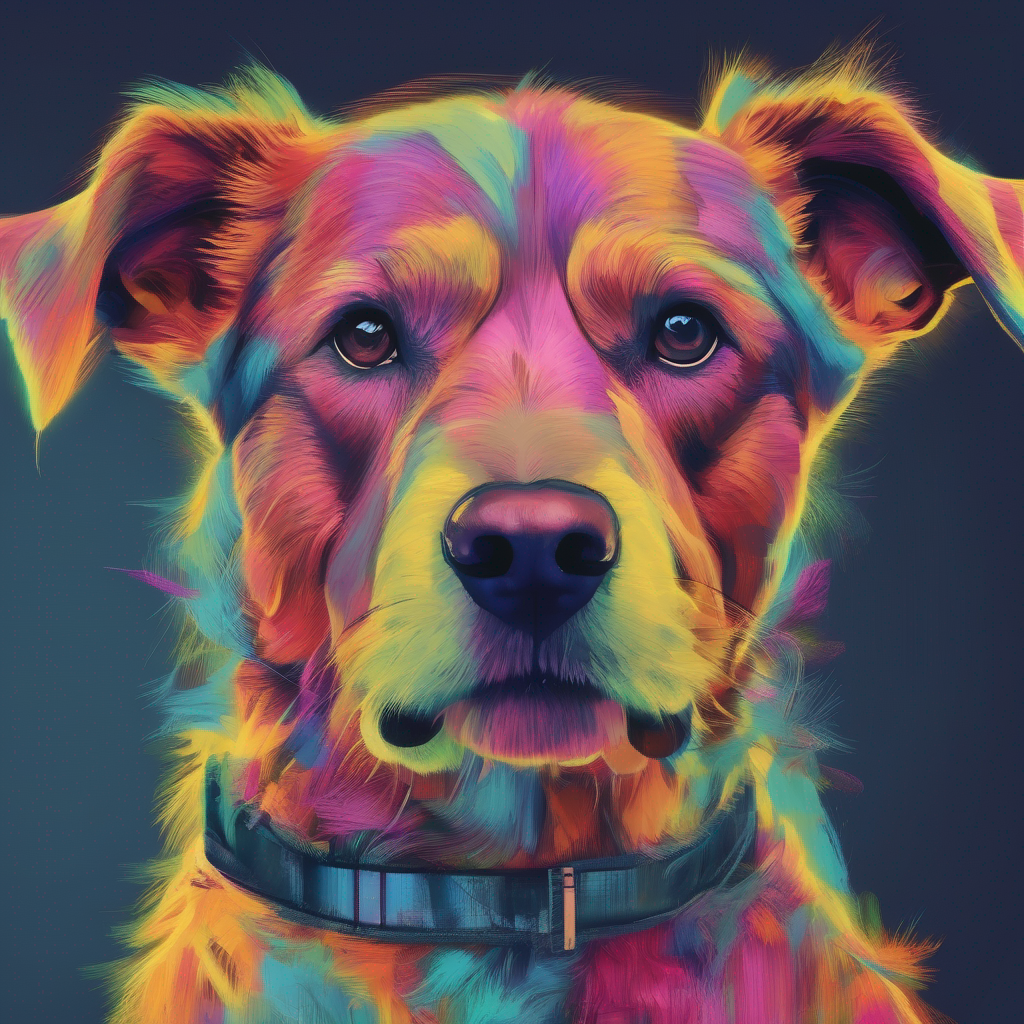

In [2]:
from diffusers import DiffusionPipeline


pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    unet=unet_new,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
).to("cuda")
gen = torch.Generator().manual_seed(42)
pipe("a colorful, movie like photo of dog", generator=gen).images[0]